In [13]:
# read the network
filepath = 'graphExampleSmall.graph'
vertices = [];
edges = [];
readVertices = 0;
readEdges = 0;
with open(filepath) as fp:  
    line = fp.readline()
    cnt = 1
    while line:
        #print("Line {}: {}".format(cnt, line.strip()))
        
        if readVertices == 1:
            vertexData = line.strip().split(';');
            if len(vertexData)==4:
                idxGroup = int(vertexData[3]);
                vertices.append([int(vertexData[0]),idxGroup])
                
        if readEdges == 1:
            edgeData = line.strip().split(';');
            if len(edgeData)==2:
                edges.append([int(edgeData[0]),int(edgeData[1])])
                vertices[int(edgeData[0])].append(int(edgeData[1]));

        
        if line.strip() == '# Vertices':
            print('read vertices')
            readVertices = 1;
        if line.strip() == '# Edges':
            readVertices = 0;
            readEdges = 1;
            print('read edge')
        line = fp.readline()
        cnt += 1
        line.strip() 
#print(vertices[:])
print(edges)

read vertices
read edge
[[0, 12], [0, 27], [0, 5], [0, 18], [0, 22], [0, 11], [1, 15], [1, 19], [1, 13], [1, 2], [1, 6], [1, 24], [1, 3], [1, 14], [1, 23], [2, 15], [2, 1], [2, 19], [2, 13], [2, 24], [2, 6], [2, 3], [2, 25], [2, 14], [2, 23], [3, 1], [3, 2], [3, 24], [3, 6], [4, 20], [4, 17], [4, 21], [4, 28], [4, 7], [4, 29], [4, 26], [4, 8], [5, 0], [5, 12], [5, 27], [5, 9], [5, 18], [5, 22], [5, 11], [6, 15], [6, 1], [6, 19], [6, 13], [6, 2], [6, 24], [6, 3], [6, 23], [7, 16], [7, 20], [7, 21], [7, 28], [7, 25], [7, 4], [7, 29], [7, 26], [8, 20], [8, 10], [8, 4], [8, 29], [9, 12], [9, 27], [9, 5], [9, 18], [9, 22], [9, 11], [10, 20], [10, 29], [10, 26], [10, 8], [11, 0], [11, 15], [11, 12], [11, 27], [11, 9], [11, 5], [11, 18], [11, 22], [12, 0], [12, 9], [12, 27], [12, 5], [12, 18], [12, 22], [12, 11], [13, 1], [13, 19], [13, 2], [13, 6], [13, 24], [13, 14], [13, 23], [14, 15], [14, 1], [14, 19], [14, 13], [14, 2], [14, 24], [15, 1], [15, 2], [15, 6], [15, 14], [15, 11], [15, 26], 

/usr/local/lib/python2.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


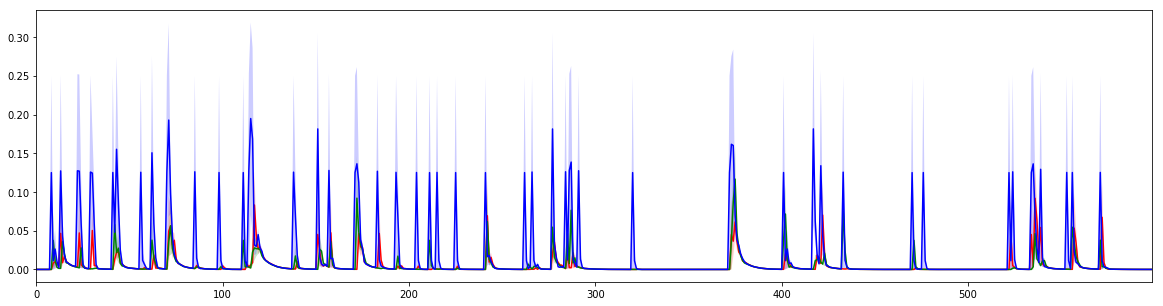

In [2]:
import numpy as np


modelConectivity = 1;

nCommunities = 3;
n = len(vertices); 
s = np.zeros(n);
T = 600;
St = np.zeros((T,n));
lam = 0.002;
# Flag para modelar interacción social
intSoc = 1;
# Impacto de la creencia de los otros respecto a la inseguridad inseguridad
nu = 0.5;
# Resistencia a creer en la inseguridad
mu = 0.9;
# Velocidad de perdida de memoria
psi = 0.9;
for t in range(T):
    st = s;
    for k in range(n):
        # s[k] perpepción de inseguridad del sujeto k
        # Es victima del crimen
        
        crimeFactor = 1;
        
        if vertices[k][1]==0:
            crimeFactor = 0;
        elif vertices[k][1]==1:
            crimeFactor = 0;
        elif vertices[k][1]==2:
            crimeFactor = 5;
        else:
            crimeFactor = 1;
        X = np.random.poisson(crimeFactor*lam);
        # Hubo un delito
        if X>0: 
            s[k] = 1;        
        else:
            if intSoc == 1:
                # Busca un aleatoriamente vecino al que este conectado
                if modelConectivity==2:
                    jt = 0;
                    if (len(vertices[k])-3) > 0:
                        jt = np.random.randint(0, len(vertices[k])-3);
                    jt = jt +  2;                
                    j = vertices[k][jt];

                # Busca un aleatoriamente a cualquier vecino
                if modelConectivity==1:
                    # Busca un aleatoriamente a cualquier vecino conectado
                    j = np.random.randint(0, n-1);
                    if j >= k:
                        j = j+1;
                
                
                # la percepción del vecino sobre la inseguridad es mas alta que la mia
                if s[k] < s[j]:                    
                    s[k] = psi*(st[k] - nu*(st[k] - st[j])); # aumenta mi percepción de la inseguridad
                else: # la percepción del vecino sobre la inseguridad es mas baja que la mia                    
                    s[k] = psi*(st[k] - mu*(st[k] - st[j])); # disminuye la percepción de la inseguridad mi percepción de la inseguridad
            else:
                s[k] = psi*st[k];
    St[t,:] = s;


idxGroup = [];
for i in range(0,len(vertices)):
    idxGroup.append(vertices[i][1])

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
colorVec = ["r","g","b","y"]
plotIndividual = 0;

if plotIndividual == 1:
    plt.figure(figsize=(20,5))
    for i in range(0,nCommunities):
        a=np.array(idxGroup)
        stRed = St[:,np.where(a == i)];    
        stRedRed = np.reshape(stRed,(stRed.shape[0],stRed.shape[2])).transpose();        
        current_palette = sns.color_palette()    
        for j in range(stRedRed.shape[0]):
            ax = sns.tsplot(data=stRedRed[j], color=colorVec[i])  

plt.figure(figsize=(20,5))        
for i in range(0,nCommunities):
    a=np.array(idxGroup)
    stRed = St[:,np.where(a == i)];    
    stRedRed = np.reshape(stRed,(stRed.shape[0],stRed.shape[2])).transpose();    
    current_palette = sns.color_palette()        
    ax = sns.tsplot(data=stRedRed, color=colorVec[i])        

In [3]:
stRed

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       ...,

       [[7.24136324e-06, 6.72410547e-06, 6.28079044e-06, ...,
         5.61511532e-06, 5.41249754e-06, 6.33956909e-06]],

       [[5.25566968e-06, 5.63186703e-06, 4.94939415e-06, ...,
         5.11138887e-06, 4.06204755e-06, 4.71078620e-06]],

       [[4.64994905e-06, 3.87469824e-06, 3.52160554e-06, ...,
         3.30630648e-06, 3.73222272e-06, 4.17522190e-06]]])